Blinkit Project


In [2]:
import pandas as pd
import matplotlib.pyplot as m
import numpy as n


In [3]:
df=pd.read_csv(r"C:\Users\HP\Downloads\blinkit_data.csv")

In [4]:
df.head(20)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


Data Cleaning

In [5]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [6]:
df['Item Fat Content']=df['Item Fat Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [7]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


Business Requirements

KPI's Requirements

In [8]:
#Total Sales
total_sales=round(df['Sales'].sum())

#Average sales
average_Sales=(df['Sales'].mean())

#No.of Items Sold
no_of_items_sold=round(df['Sales'].count())

#Average Ratings
Average_ratings=(df['Rating'].mean())

print(f'Total_Sales=${total_sales:,}')
print(f'Average_Sale=${average_Sales:,.1f}')
print(f'No_Of_Items_Sold={no_of_items_sold:,}')
print(f'Average_Rating={Average_ratings:,.1f}')

Total_Sales=$1,201,681
Average_Sale=$141.0
No_Of_Items_Sold=8,523
Average_Rating=4.0


**Charts Requirements**

**Total Sales by Fat Content**

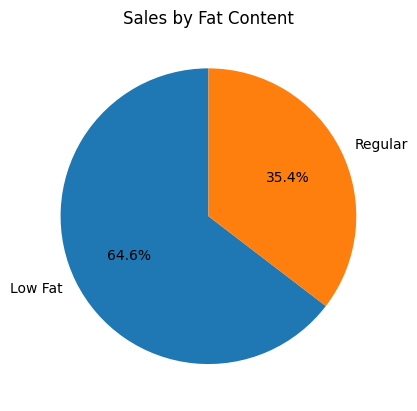

In [9]:
sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()
m.pie(sales_by_fat,labels= sales_by_fat.index,
      autopct= '%.1f%%',startangle= 90)
m.title('Sales by Fat Content')
m.show()


**Total Sales by Item Type**

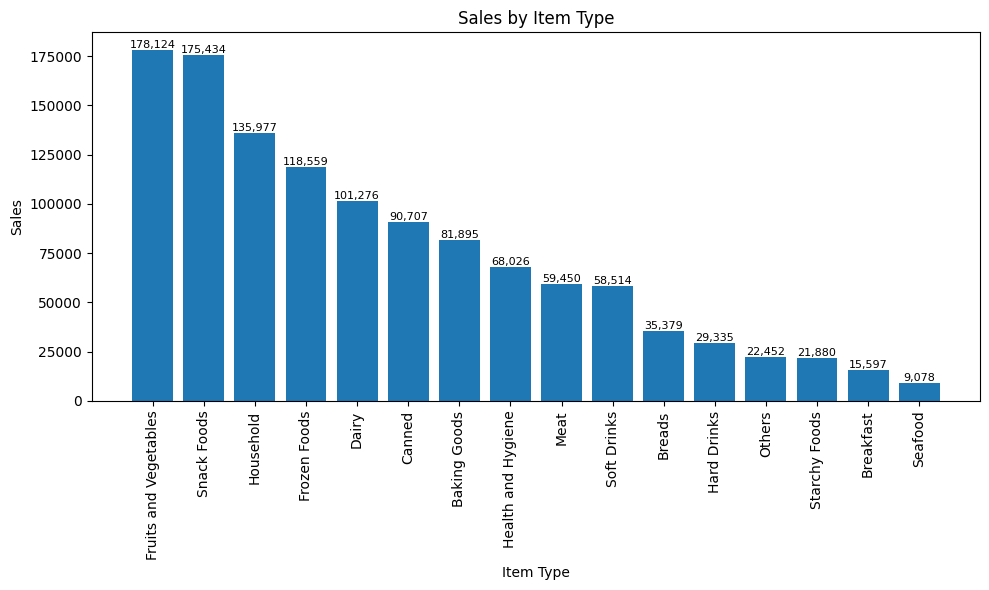

In [10]:
sales_by_type=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
m.figure(figsize=(10,6))
bars=m.bar(sales_by_type.index, sales_by_type.values)
m.xticks(rotation=90)
m.xlabel('Item Type')
m.ylabel('Sales')
m.title('Sales by Item Type')

for bar in bars:
    m.text(bar.get_x()+ bar.get_width()/2,bar.get_height(),
           f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8)
m.tight_layout()
m.show()


**Fat Content By Outlets For Total Sales**

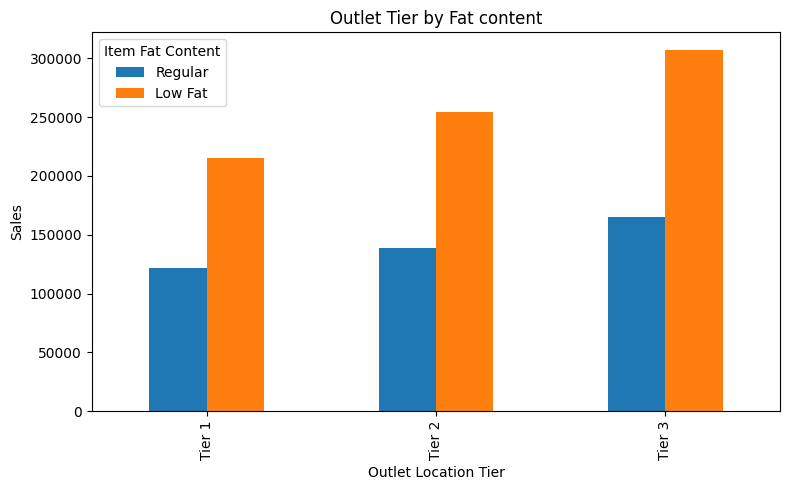

In [11]:
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]
ax=grouped.plot(kind='bar', figsize=(8,5),title='Outlet Tier by Fat content')
m.xlabel('Outlet Location Tier')
m.ylabel('Sales')
m.tight_layout()
m.show()

**Total Sales by Outlet Establishment**

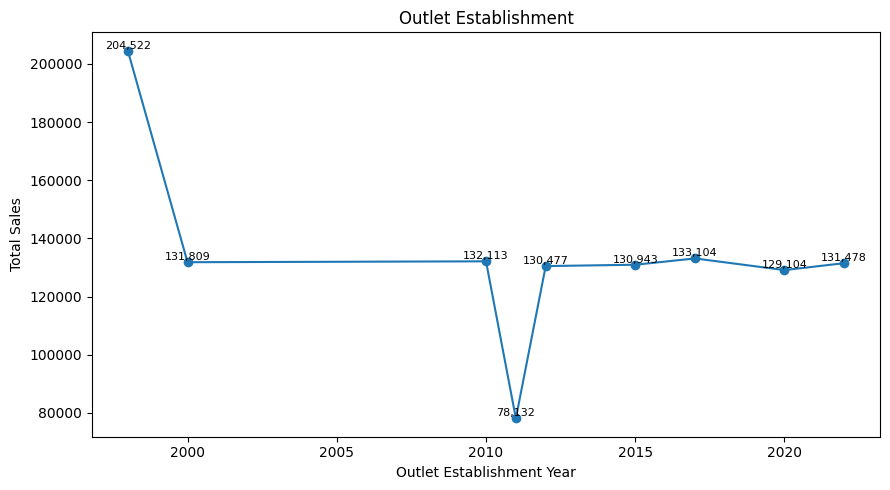

In [18]:
sales_by_year=df.groupby('Outlet Establishment Year') ['Sales'].sum().sort_index()
m.figure(figsize=(9,5))
m.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-')
m.xlabel('Outlet Establishment Year')
m.ylabel('Total Sales')
m.title('Outlet Establishment')

for x,y in zip(sales_by_year.index,sales_by_year.values):
    m.text(x, y, f'{y:,.0f}',ha='center',va='bottom',fontsize=8)
m.tight_layout()
m.show()

**Sales by Outlet Size**

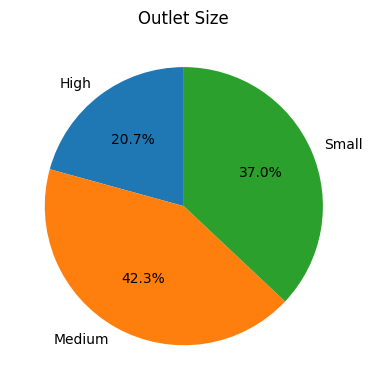

In [21]:
sales_by_size=df.groupby('Outlet Size')['Sales'].sum()
m.figure(figsize=(4,4))
m.pie(sales_by_size,labels=sales_by_size.index,autopct='%.1f%%',startangle=90)
m.title('Outlet Size')
m.tight_layout()
m.show()

**Sales by Outlet Location**

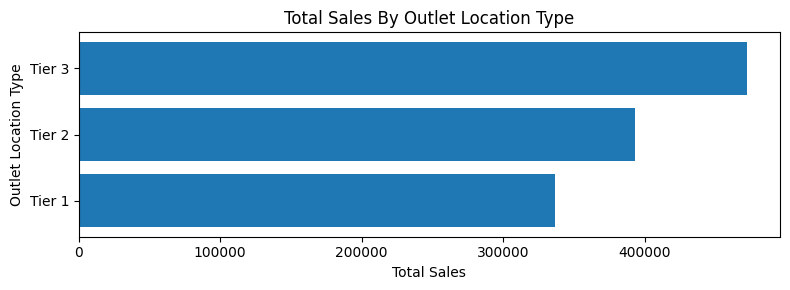

In [35]:
sales_by_location=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location=sales_by_location.sort_values(by='Sales',ascending=False)

m.figure(figsize=(8,3))
m.barh(sales_by_location.index,sales_by_location['Sales'])
m.yticks(
    sales_by_location.index,
    sales_by_location['Outlet Location Type'])
m.title('Total Sales By Outlet Location Type')
m.xlabel('Total Sales')
m.ylabel('Outlet Location Type')

m.tight_layout()
m.show()